# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

656

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
city_name = []
lat = []
lon = []
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
index = 1
setindex = 1

print("Beginning Data Retrieval\n-----------------------------")

for city in cities:
    print(f"Processing Record {index} of Set {setindex} | {city}")
    response = requests.get(query_url + city)
    
    if response.status_code == 200:
        response = response.json()
        city_name.append(city)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])  
        wind_speed.append(response['wind']['speed'])  
    else:
        print ('City not found. Skipping...')
        
    if index < 50:
        index += 1
    else:  
        index = 1
        setindex += 1

print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ituni
City not found. Skipping...
Processing Record 2 of Set 1 | ewa beach
Processing Record 3 of Set 1 | amurzet
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | carlsbad
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | weligama
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | kavieng
Processing Record 10 of Set 1 | lolua
City not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | vao
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | pacific grove
Processing Record 15 of Set 1 | laguna
Processing Record 16 of Set 1 | samusu
City not found. Skipping...
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | sao filipe
Proces

Processing Record 26 of Set 8 | novobelokatay
Processing Record 27 of Set 8 | alekseyevsk
Processing Record 28 of Set 8 | chara
Processing Record 29 of Set 8 | margate
Processing Record 30 of Set 8 | sukabumi
Processing Record 31 of Set 8 | kamaishi
Processing Record 32 of Set 8 | sao jose da coroa grande
Processing Record 33 of Set 8 | dumas
Processing Record 34 of Set 8 | saint-francois
Processing Record 35 of Set 8 | polyarnyye zori
Processing Record 36 of Set 8 | dzaoudzi
Processing Record 37 of Set 8 | santa maria
Processing Record 38 of Set 8 | culfa
Processing Record 39 of Set 8 | baiyin
Processing Record 40 of Set 8 | jutai
Processing Record 41 of Set 8 | vattalkundu
Processing Record 42 of Set 8 | vardo
Processing Record 43 of Set 8 | araceli
Processing Record 44 of Set 8 | cap malheureux
Processing Record 45 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 46 of Set 8 | brae
Processing Record 47 of Set 8 | neuruppin
Processing Record 48 of Set 8 | candido

City not found. Skipping...
Processing Record 14 of Set 12 | sawakin
Processing Record 15 of Set 12 | khasan
Processing Record 16 of Set 12 | iquitos
Processing Record 17 of Set 12 | borda da mata
Processing Record 18 of Set 12 | salinopolis
Processing Record 19 of Set 12 | palauig
Processing Record 20 of Set 12 | camacupa
Processing Record 21 of Set 12 | selfoss
Processing Record 22 of Set 12 | narsaq
Processing Record 23 of Set 12 | ramgarh
Processing Record 24 of Set 12 | lompoc
Processing Record 25 of Set 12 | pirovskoye
Processing Record 26 of Set 12 | karratha
Processing Record 27 of Set 12 | netanya
Processing Record 28 of Set 12 | labuhan
Processing Record 29 of Set 12 | te anau
Processing Record 30 of Set 12 | dunedin
Processing Record 31 of Set 12 | college
Processing Record 32 of Set 12 | conde
Processing Record 33 of Set 12 | basco
Processing Record 34 of Set 12 | guigue
Processing Record 35 of Set 12 | berlevag
Processing Record 36 of Set 12 | qaqortoq
Processing Record 37

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lon,
    "Max Temp" : max_temp,
    "Wind Speed" : wind_speed 
}
cityweather_df = pd.DataFrame(city_dict)
cityweather_df.to_csv("Output/cities.csv", index=True, header=True)
cityweather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ewa beach,20,US,1598271896,74,21.32,-158.01,80.60,11.21
1,amurzet,100,RU,1598271896,96,47.70,131.10,65.25,5.75
2,saint-philippe,38,RE,1598271896,64,-21.36,55.77,75.20,20.80
3,carlsbad,90,US,1598271830,94,33.16,-117.35,75.20,3.36
4,ushuaia,75,AR,1598271856,86,-54.80,-68.30,30.20,20.80
...,...,...,...,...,...,...,...,...,...
599,pangody,96,RU,1598272038,68,65.85,74.49,59.25,16.69
600,evensk,100,RU,1598272038,67,61.95,159.23,46.96,0.69
601,shimoda,11,JP,1598272038,86,34.67,138.95,73.99,4.68
602,oktyabrskiy,60,RU,1598272038,59,54.48,53.47,72.91,7.70


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
cityindices = cityweather_df[cityweather_df["Humidity"] > 100].index

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cityweather_df.drop(cityindices, inplace=False)
clean_city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ewa beach,20,US,1598271896,74,21.32,-158.01,80.60,11.21
1,amurzet,100,RU,1598271896,96,47.70,131.10,65.25,5.75
2,saint-philippe,38,RE,1598271896,64,-21.36,55.77,75.20,20.80
3,carlsbad,90,US,1598271830,94,33.16,-117.35,75.20,3.36
4,ushuaia,75,AR,1598271856,86,-54.80,-68.30,30.20,20.80
...,...,...,...,...,...,...,...,...,...
599,pangody,96,RU,1598272038,68,65.85,74.49,59.25,16.69
600,evensk,100,RU,1598272038,67,61.95,159.23,46.96,0.69
601,shimoda,11,JP,1598272038,86,34.67,138.95,73.99,4.68
602,oktyabrskiy,60,RU,1598272038,59,54.48,53.47,72.91,7.70


In [7]:
# Export the City_Data into a csv
clean_city_data.to_csv("Output/cleaned_cities.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

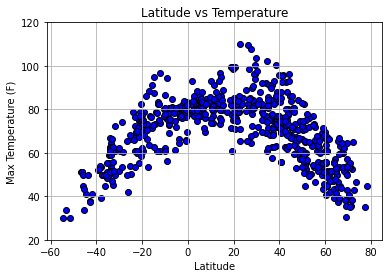

In [8]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], facecolors="blue", edgecolors="black")

plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(20, 120)
plt.grid()

plt.savefig("Images/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

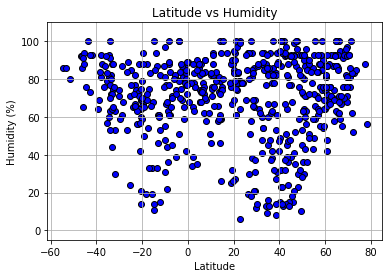

In [9]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], facecolors="blue", edgecolors="black")

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-5, 110)
plt.grid()

# Save plot as image
plt.savefig("Images/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

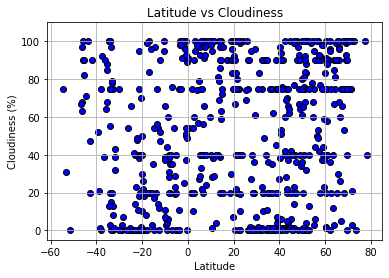

In [10]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], facecolors="blue", edgecolors="black")

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5, 110)
plt.grid()

# Save plot as image
plt.savefig("Images/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

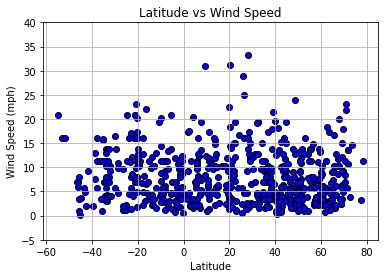

In [11]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], facecolors="blue", edgecolors="black")

plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-5, 40)
plt.grid()

# Save plot as image
plt.savefig("Images/Fig4.png")
plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression_plot_func(x_values, y_values):
    
    fig = plt.figure()
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regression = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values, facecolors = "blue", edgecolor = "black")
    plt.plot(x_values, regression, "r-")
    
    return line_eq

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern = clean_city_data.loc[clean_city_data["Lat"] >= 0]
northern.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ewa beach,20,US,1598271896,74,21.32,-158.01,80.60,11.21
1,amurzet,100,RU,1598271896,96,47.70,131.10,65.25,5.75
3,carlsbad,90,US,1598271830,94,33.16,-117.35,75.20,3.36
5,weligama,22,LK,1598271897,74,5.97,80.42,82.99,10.25
10,butaritari,100,KI,1598271898,76,3.07,172.79,82.26,11.39


In [14]:
southern = clean_city_data.loc[clean_city_data["Lat"] < 0]
southern.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,saint-philippe,38,RE,1598271896,64,-21.36,55.77,75.20,20.80
4,ushuaia,75,AR,1598271856,86,-54.80,-68.30,30.20,20.80
6,arraial do cabo,40,BR,1598271897,77,-22.97,-42.03,68.00,8.05
7,kavieng,100,PG,1598271897,80,-2.57,150.80,78.85,3.98
8,rikitea,14,PF,1598271898,82,-23.12,-134.97,72.21,17.07


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

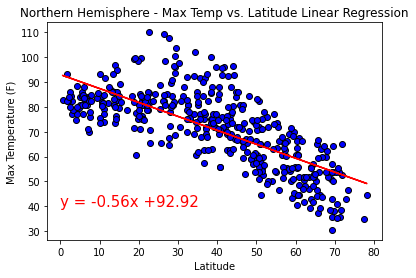

In [15]:
x_values = northern["Lat"]
y_values = northern["Max Temp"]

weather_plot = regression_plot_func(x_values, y_values)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(weather_plot,(0,40),fontsize=15,color="red")

plt.savefig("Images/N_maxtempVSlatitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

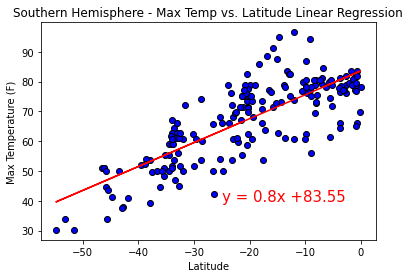

In [16]:
x_values = southern["Lat"]
y_values = southern["Max Temp"]

weather_plot = regression_plot_func(x_values, y_values)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(weather_plot,(-25,40),fontsize=15,color="red")

plt.savefig("Images/S_maxtempVSlatitude.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

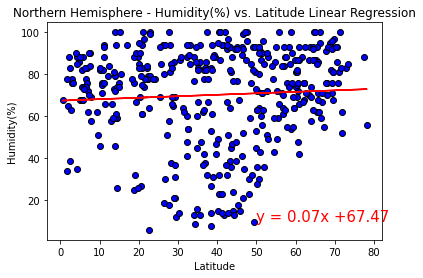

In [17]:
x_values = northern["Lat"]
y_values = northern["Humidity"]

weather_plot = regression_plot_func(x_values, y_values)
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.annotate(weather_plot,(50,10),fontsize=15,color="red")

plt.savefig("Images/N_humidityVSlatitude.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

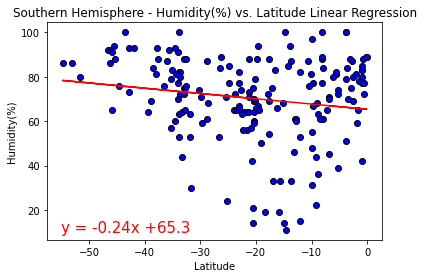

In [18]:
x_values = southern["Lat"]
y_values = southern["Humidity"]

weather_plot = regression_plot_func(x_values, y_values)
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.annotate(weather_plot,(-55,10),fontsize=15,color="red")

plt.savefig("Images/S_humidityVSlatitude.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

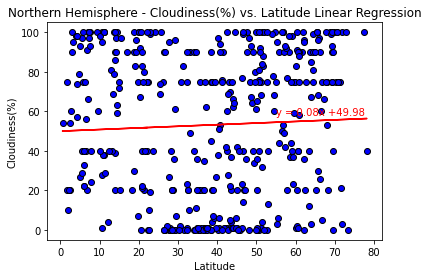

In [19]:
x_values = northern["Lat"]
y_values = northern["Cloudiness"]

weather_plot = regression_plot_func(x_values, y_values)
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.annotate(weather_plot,(55,58),fontsize=10,color="red")

plt.savefig("Images/N_cloudinessVSlatitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

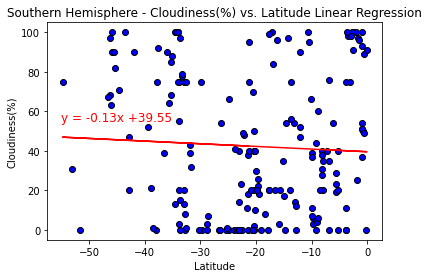

In [20]:
x_values = southern["Lat"]
y_values = southern["Cloudiness"]

weather_plot = regression_plot_func(x_values, y_values)
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.annotate(weather_plot,(-55,55),fontsize=12,color="red")

plt.savefig("Images/S_cloudinessVSlatitude.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

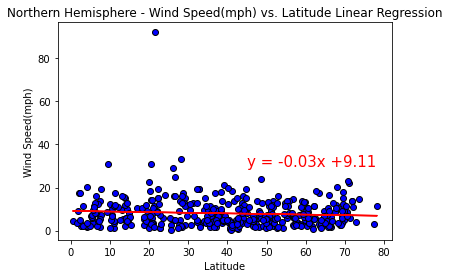

In [21]:
x_values = northern["Lat"]
y_values = northern["Wind Speed"]

weather_plot = regression_plot_func(x_values, y_values)
plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.annotate(weather_plot,(45,30),fontsize=15,color="red")

plt.savefig("Images/N_WindSpeedVSlatitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

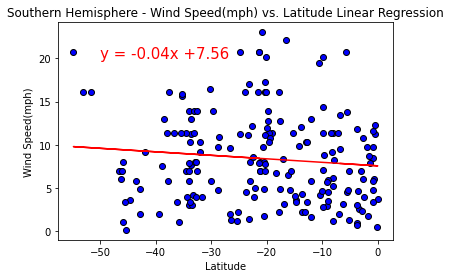

In [22]:
x_values = southern["Lat"]
y_values = southern["Wind Speed"]

weather_plot = regression_plot_func(x_values, y_values)
plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.annotate(weather_plot,(-50,20),fontsize=15,color="red")

plt.savefig("Images/S_WindSpeedVSlatitude.png")

### Oberservations (based on data retrieved on 24/08/2020)###
1. From the trend in temperature vs latitude plot, we can see max temperature goes up for the cities closer to the equator and drops towards northern and southern hamisphere.
2. How far or close the city is from the equator has some effects on cloudiness percentage as seen in cloudiness vs latitude plot.
3. Humidity percentage is comparitively less at the cities close to the equator.

Overall, city's temperature has the most effect of its distance from the 0 latitude (the equator line).